In [1]:
from collections import OrderedDict
import os.path as osp

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
models_dir = osp.join('..', 'models')

model_to_id = OrderedDict([('RotatE', '36viovqn'),
                            ('BioBLP-P', '4o6x9h96'),
                            ('BioBLP-M', '1r75g9na'),
                            ('BioBLP-D', '38uz9fjs')])

model_to_results = dict()
for model_name, model_id in model_to_id.items():
    model_dir = osp.join(models_dir, model_id)
    model_to_results[model_name] = pd.read_csv(osp.join(model_dir, 'results_by_relation.csv'), sep='\t')

In [3]:
# metric = 'both.realistic.hits_at_10'
metric = 'both.realistic.inverse_harmonic_mean_rank'

# Create a new dataframe selecting the metrics for each model result in model_to_results
df = pd.DataFrame({model_name: model_results[metric] for model_name, model_results in model_to_results.items()})
df['relation'] = model_to_results['RotatE']['relation']
df['count'] = model_to_results['RotatE']['count']
# Put the relation and count columns first
df = df[['relation', 'count'] + list(df.columns[:-2])]
df

,relation,count,RotatE,BioBLP-P,BioBLP-M,BioBLP-D
0,COMPLEX_IN_PATHWAY,878,0.510198,0.489181,0.422426,0.364438
1,COMPLEX_TOP_LEVEL_PATHWAY,1649,0.405878,0.409530,0.427044,0.085952
2,DDI,120830,0.643250,0.653143,0.051539,0.614517
3,DISEASE_GENETIC_DISORDER,261,0.937318,0.936255,0.941037,0.632748
4,DISEASE_PATHWAY_ASSOCIATION,293,0.335229,0.302996,0.296131,0.116741
5,DPI,527,0.610447,0.410475,0.098982,0.404701
6,DRUG_CARRIER,13,0.658994,0.479418,0.272434,0.315900
7,DRUG_DISEASE_ASSOCIATION,6749,0.091861,0.091827,0.015866,0.025838
8,DRUG_ENZYME,67,0.450234,0.395737,0.258142,0.361217
9,DRUG_PATHWAY_ASSOCIATION,426,0.477193,0.498763,0.107805,0.352183


Let's check that the micro-averages correspond to our results in the paper.

In [4]:
for model_name in model_to_id:
    print(f"{model_name:<10} {(df[model_name] * df['count']).sum() / df['count'].sum():.2%}")

RotatE     55.20%
BioBLP-P   47.30%
BioBLP-M   14.34%
BioBLP-D   49.69%


Cool, they do. Before plotting, let's sort the dataframe by the RotatE column.

In [5]:
df = df.sort_values(by='RotatE', ascending=False)
df

,relation,count,RotatE,BioBLP-P,BioBLP-M,BioBLP-D
3,DISEASE_GENETIC_DISORDER,261,0.937318,0.936255,0.941037,0.632748
10,DRUG_TARGET,745,0.829291,0.722980,0.089040,0.648614
12,MEMBER_OF_COMPLEX,8127,0.768589,0.317997,0.720274,0.706512
6,DRUG_CARRIER,13,0.658994,0.479418,0.272434,0.315900
2,DDI,120830,0.643250,0.653143,0.051539,0.614517
5,DPI,527,0.610447,0.410475,0.098982,0.404701
0,COMPLEX_IN_PATHWAY,878,0.510198,0.489181,0.422426,0.364438
11,DRUG_TRANSPORTER,35,0.481233,0.373990,0.204251,0.281959
9,DRUG_PATHWAY_ASSOCIATION,426,0.477193,0.498763,0.107805,0.352183
15,PROTEIN_PATHWAY_ASSOCIATION,23949,0.466824,0.076533,0.403752,0.344873


Now we can plot the results in a bar chart, with relation on the x-axis and the metric for each model on the y-axis.

Text(0, 0.5, 'Relation')

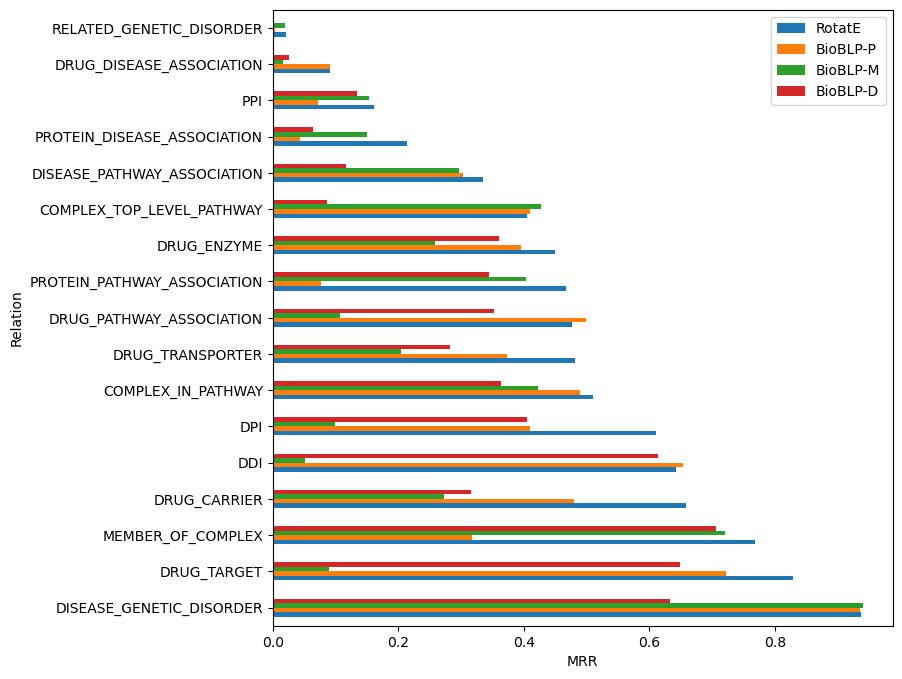

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))
df.plot.barh(x='relation', y=list(model_to_id), ax=ax)
ax.set_xlabel('MRR')
ax.set_ylabel('Relation')

In [16]:
# Show the dataframe color coded by the metric, using red for the worst and green for the best
df.style.background_gradient(cmap='RdBu', axis=1, subset=list(model_to_id))

,relation,count,RotatE,BioBLP-P,BioBLP-M,BioBLP-D
3,DISEASE_GENETIC_DISORDER,261,0.937318,0.936255,0.941037,0.632748
10,DRUG_TARGET,745,0.829291,0.722980,0.089040,0.648614
12,MEMBER_OF_COMPLEX,8127,0.768589,0.317997,0.720274,0.706512
6,DRUG_CARRIER,13,0.658994,0.479418,0.272434,0.315900
2,DDI,120830,0.643250,0.653143,0.051539,0.614517
5,DPI,527,0.610447,0.410475,0.098982,0.404701
0,COMPLEX_IN_PATHWAY,878,0.510198,0.489181,0.422426,0.364438
11,DRUG_TRANSPORTER,35,0.481233,0.373990,0.204251,0.281959
9,DRUG_PATHWAY_ASSOCIATION,426,0.477193,0.498763,0.107805,0.352183
15,PROTEIN_PATHWAY_ASSOCIATION,23949,0.466824,0.076533,0.403752,0.344873
